# ISLR-Python: Ch7 Applied 7

- [Generate Data](#Generate-Data)
- [Single Backfit](#Single-Backfit)
- [Full Backfitting](#Full-Backfitting)

In [70]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

## Generate Data

In [6]:
#use make regression to generate a linear regression dataset with 100 informative predictors and 1000 samples
X, y, coef_ = make_regression(n_samples=1000, n_features=100, coef=True, n_informative=100)

## Single Backfit

Lets start by making a sinle backfit estimate over all 100 predictors. We do this by calculating the partial residue Y-X'*beta' where X' and beta' are the original X and beta BUT missing the column for the predictor. We then perform simple linear regression using the held out predictor onto the partial residue. We repeat this process for all predictors to generate a first-pass array of all coeff estimates. 

In [39]:
# try a single backfit
betas = np.zeros([100,1])

for predictor in np.arange(0,len(coef_)):
    # get the partial residue
    partial = y.reshape(-1,1) - np.dot(np.delete(X,predictor,axis=1), np.delete(betas,predictor,axis=0))
    # get the estimate of the predictors coeff.
    betas[predictor] = LinearRegression().fit(X[:,predictor,np.newaxis], partial).coef_[0]
    
#print(betas)    

## Full Backfitting

Now that we can see how to do a backfit over 100 predictors for a single iteration lets try it out for 1000 iterations and keep track of the maximum difference between the backfitting coeffecient estimates and the OLS coeffecient estimates.

In [107]:
# Fit the data using multiple linear regression-- will serve as baseline
betas_mlr = LinearRegression(fit_intercept=False).fit(X,y).coef_.reshape(-1,1)

betas = np.zeros([100,1])
diffs = np.empty([100,1])

for iteration in np.arange(1,100):
    for predictor in np.arange(0,len(coef_)):
        # get the partial residue for this predictor
        partial = y.reshape(-1,1) - np.dot(np.delete(X,predictor,axis=1), np.delete(betas,predictor,axis=0))
        # get the estimate of the predictors coeff.
        betas[predictor] = LinearRegression().fit(X[:,predictor,np.newaxis], partial).coef_[0] 
        
    # for each iteration compute the differences in the backfit and multiple linear regression betas
    diffs[iteration] = np.max(betas-betas_mlr)

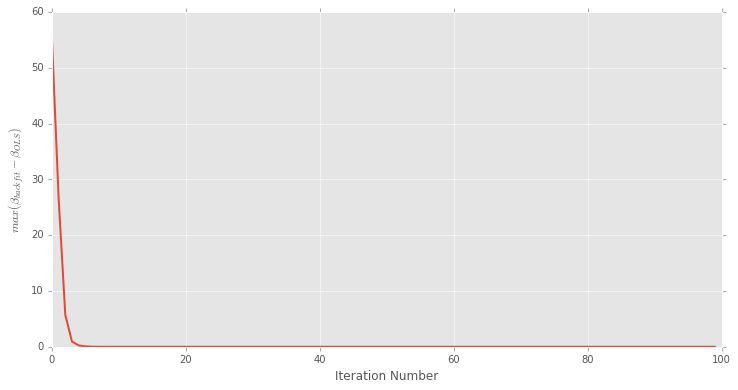

In [109]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
ax.plot(range(len(diffs)), diffs, lw=2, label='Backfit vs. OLS Coeffs')
ax.set_xlabel('Iteration Number');
ax.set_ylabel(r'$max( \beta_{backfit} - \beta_{OLS})$');

So within 20 iterations the maximum difference between the Backfitting and OLS coeffecients becomes very small.